In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [226]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    shear_range=0.2,
    rotation_range=20,
    vertical_flip=True,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255
) 

test_datagen = ImageDataGenerator(
    rescale=1./255
) 

In [227]:
Heigth = 128
Width = 128
Channels = 3

In [228]:
train_data = train_datagen.flow_from_directory(
    "Brain-Tumor-MRI/Training",
    target_size=(Heigth,Width),
    class_mode="categorical",
    subset="training",
    batch_size=32)

val_data = train_datagen.flow_from_directory(
    "Brain-Tumor-MRI/Training",
    target_size=(Heigth,Width),
    class_mode="categorical",
    subset="validation",
    batch_size=32)

test_data = train_datagen.flow_from_directory(
    "Brain-Tumor-MRI/Testing",
    target_size=(Heigth,Width),
    class_mode="categorical",
    batch_size=32,
    shuffle=False)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


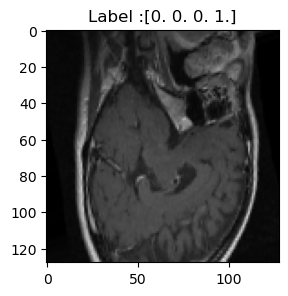

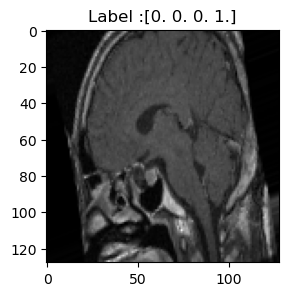

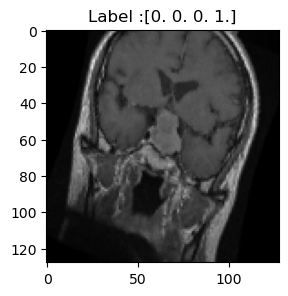

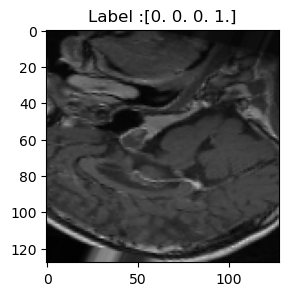

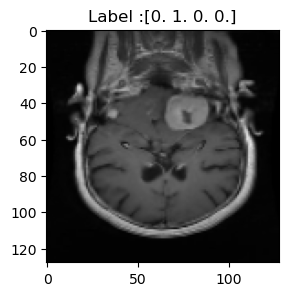

In [229]:
train_image,train_label = next(train_data)
n = 5
for i in range(n):
    plt.figure(figsize=(3,4))
    plt.imshow(train_image[i])
    plt.title(f"Label :{train_label[i]}")

In [230]:
train_data.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [231]:
train_data.labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [232]:
resnet_model = tf.keras.applications.ResNet50(
    include_top=False,
    classes="categorical",
     weights='imagenet',
    input_shape=(Heigth,Width,Channels))

for layer in resnet_model.layers:
    layer.trainable = False 
  

In [233]:
"""
vgg_model = tf.keras.applications.VGG16(include_top=False,
                                        classes="categorical",
                                        weights="imagenet",
                                        input_shape=(Heigth,Width,Channels))

for layer in vgg_model.layers:
    layer.trainable = False 
 
""" 

'\nvgg_model = tf.keras.applications.VGG16(include_top=False,\n                                        classes="categorical",\n                                        weights="imagenet",\n                                        input_shape=(Heigth,Width,Channels))\n\nfor layer in vgg_model.layers:\n    layer.trainable = False \n \n'

In [252]:
model = tf.keras.models.Sequential()

model.add(resnet_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1024,activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=4,activation="softmax"))

In [253]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_38 (Flatten)        (None, 32768)             0         
                                                                 
 dense_107 (Dense)           (None, 1024)              33555456  
                                                                 
 dropout_115 (Dropout)       (None, 1024)              0         
                                                                 
 dense_108 (Dense)           (None, 4)                 4100      
                                                                 
Total params: 57147268 (218.00 MB)
Trainable params: 33559556 (128.02 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [254]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [ ]:
history = model.fit(
    x=train_data,
    validation_data=val_data,
    epochs=25
)

Epoch 1/25
13/72 [====>.........................] - ETA: 35s - loss: 3.9143 - accuracy: 0.2188

In [246]:
def display_History(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    epoch = range(1,len(acc)+1)
    
    fig,axes = plt.subplots(1,2,figsize=(16,7),dpi=179)
    axes[0].plot(epoch,acc,"o--",label="Train Accuracy")
    axes[0].plot(epoch,val_acc,"rD:",label="Validation Accuracy")
    axes[0].set_xlabel("Epochs",fontsize=19)
    axes[0].set_ylabel("Accuracy",fontsize=19)
    axes[0].set_title("Accuracy vs Epochs",fontsize=19)
    axes[0].legend()
    
    
    axes[1].plot(epoch,loss,"o--",label="Train Loss")
    axes[1].plot(epoch,val_loss,"rD:",label="Validation Loss")
    axes[1].set_xlabel("Epochs",fontsize=19)
    axes[1].set_ylabel("Loss",fontsize=19)
    axes[1].set_title("Loss vs Epochs",fontsize=19)
    axes[1].legend()

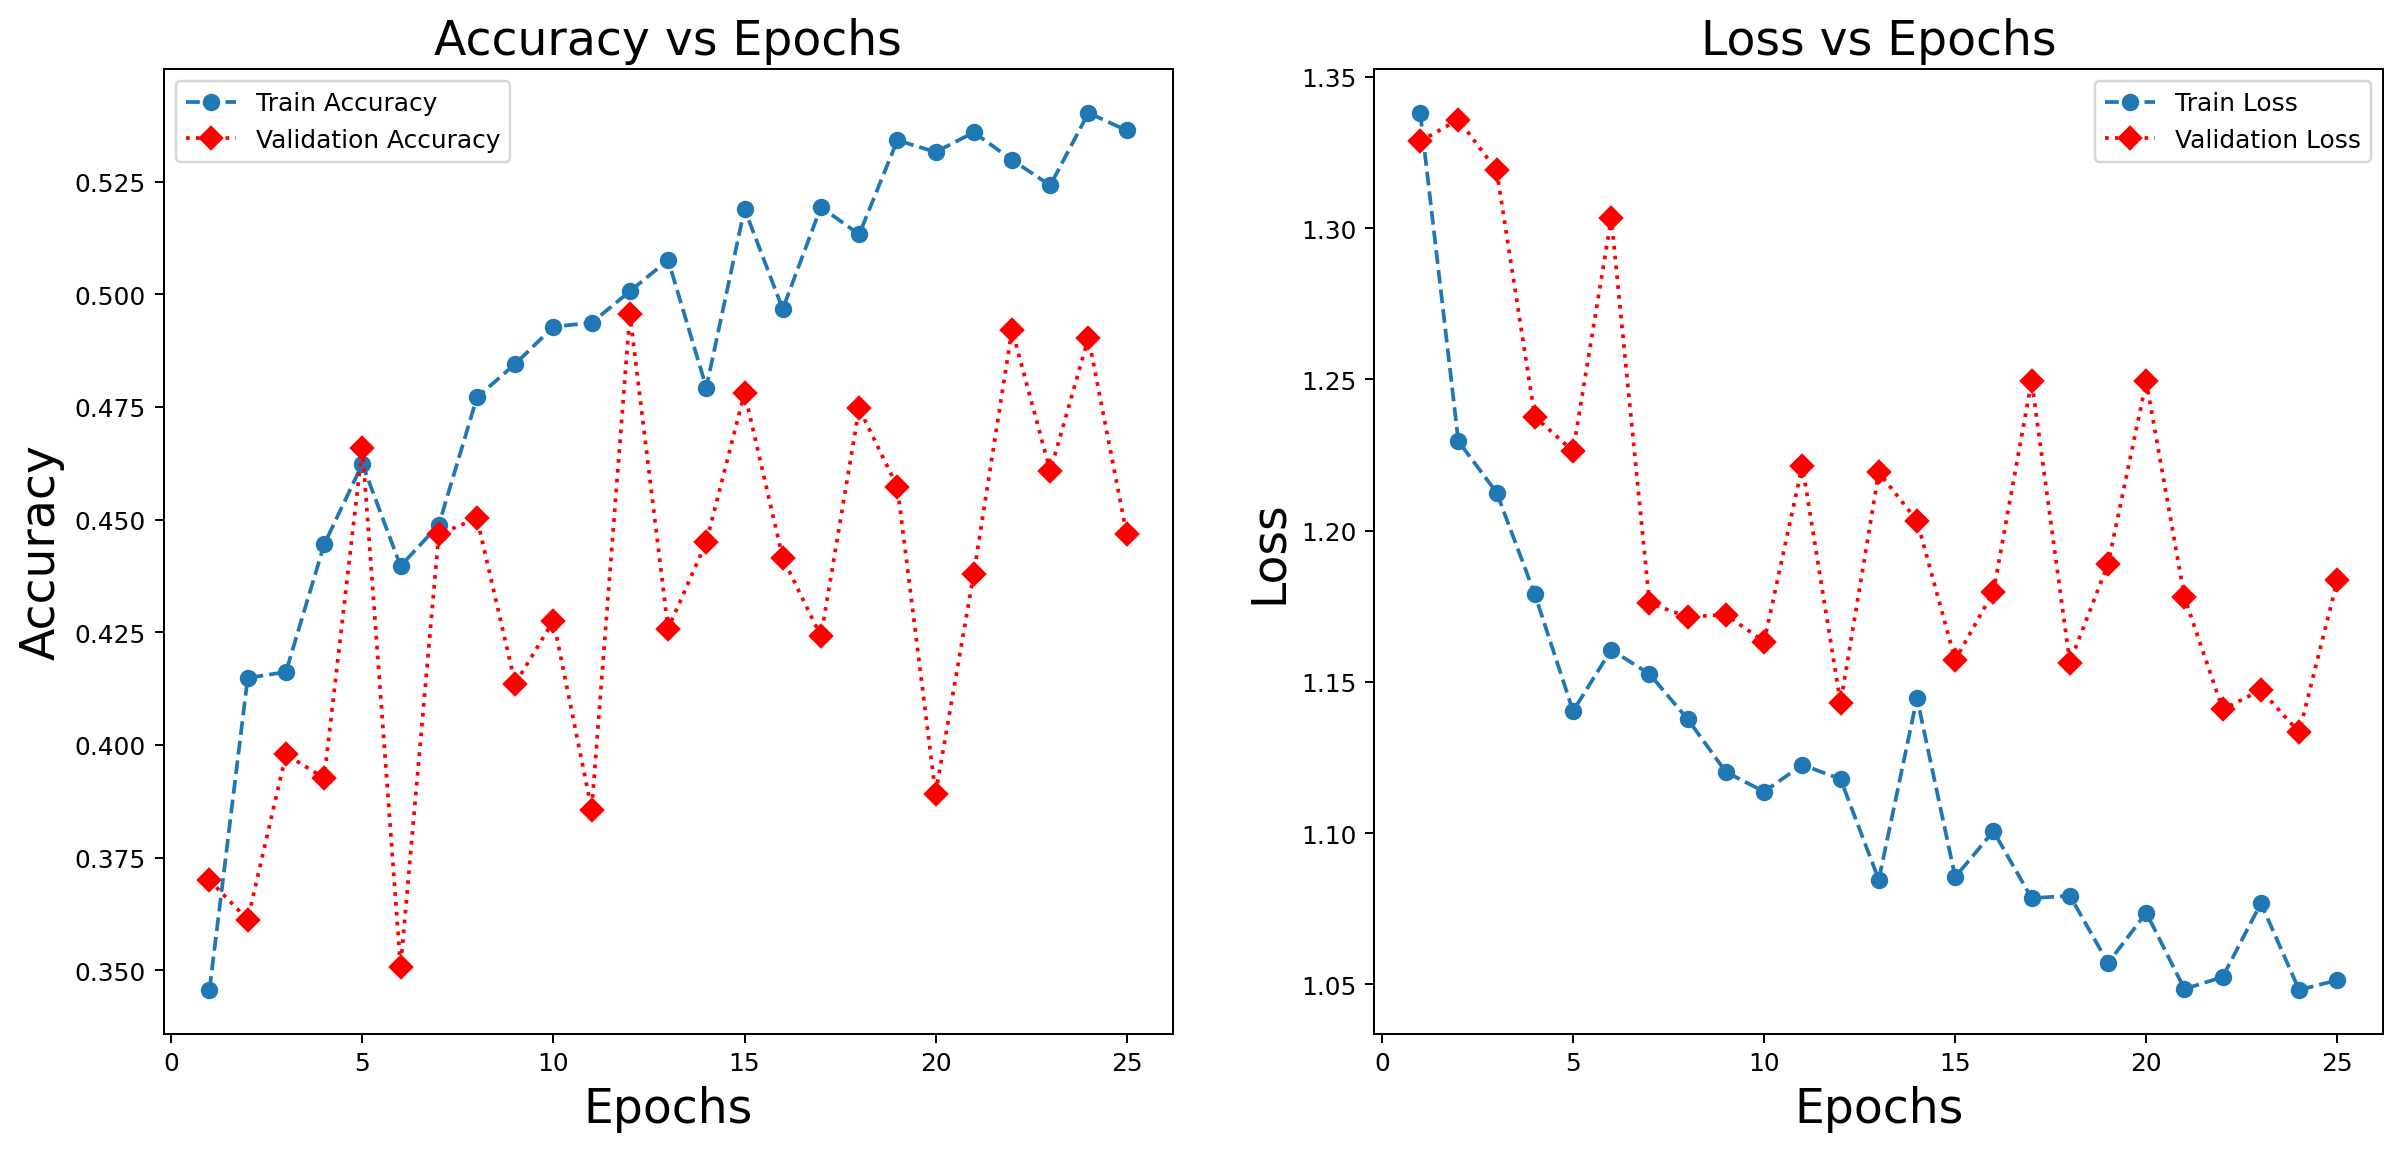

In [247]:
display_History(history)

In [104]:
model.evaluate(val_data)

18/18 [==============================] - 140s 8s/step - loss: 0.6926 - accuracy: 0.7208


[0.6925793290138245, 0.7207679152488708]

In [105]:
model.evaluate(test_data)

13/13 [==============================] - 94s 7s/step - loss: 1.4162 - accuracy: 0.5609


[1.4161769151687622, 0.5609136819839478]

In [ ]:
y_pred = model.predict(test_datiia)